In [24]:
# Data Analysis and Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For File Navigation
import os

# Our NLP Library which includes Word2Vec algorithm
import gensim

# For tokenizing corpus into sentences
import nltk
from nltk.corpus import stopwords

# For tokenizing the sentences into words, lowercase them and remove punctuation marks
from gensim.utils import simple_preprocess
# For removing stopwords
from gensim.parsing.preprocessing import remove_stopwords


import string

In [25]:
df = pd.read_csv('../Utils/AnalyseDaten.csv', encoding='ISO-8859-1')
df

,Unnamed: 0,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Character Name,Species,Gender,House,...,spell_count,SentimentScore,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag,chara
0,0,1,1,8,4,I should have known that you would be here...P...,albus dumbledore,Human,Male,Gryffindor,...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,['minerva mcgonagall']
1,1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",minerva mcgonagall,Human,Female,Gryffindor,...,[],"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,0.449,0.000,0.551,1,0,0,"['albus dumbledore', 'aberforth dumbledore', '..."
2,2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",albus dumbledore,Human,Male,Gryffindor,...,[],"{'neg': 0.256, 'neu': 0.512, 'pos': 0.232, 'co...",-0.0865,0.232,0.256,0.512,0,1,0,[]
3,3,4,1,8,7,And the boy?,minerva mcgonagall,Human,Female,Gryffindor,...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,"['boy', 'boy 2']"
4,4,5,1,8,4,Hagrid is bringing him.,albus dumbledore,Human,Male,Gryffindor,...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,['rubeus hagrid']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,harry potter,Human,Male,Gryffindor,...,[],"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",0.4854,0.133,0.000,0.867,1,0,0,"['sorting hat', 'wizard']"
7440,7440,7441,234,71,84,Really?,albus potter,Human,Male,Slytherin,...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,[]
7441,7441,7442,234,71,1,Really.,harry potter,Human,Male,Gryffindor,...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,[]
7442,7442,7443,234,71,1,Ready?,harry potter,Human,Male,Gryffindor,...,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3612,1.000,0.000,0.000,1,0,0,[]


In [28]:
#Punctuation, Tokenization (NLTK), Stopwords (radikaler als Gensim)
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation," ")
    return text

df['Tokens'] = df['Dialogue'].str.lower().apply(remove_punctuations).apply(nltk.word_tokenize)
df['Tokens']
df

dialoge = df['Tokens'].tolist()
filtered_tokens = []
for line in dialoge:
    line_list = []
    for token in line:
        if token.lower() not in stopwords.words('english') and token not in string.punctuation:
            line_list.append(token)

    filtered_tokens.append(line_list)



In [31]:
model = gensim.models.Word2Vec(
    vector_size=1000,
    window=5,  
    min_count=3,
    workers=4,
    sg=1,
)

model.build_vocab(filtered_tokens, progress_per=1000)
model.train(filtered_tokens, total_examples=model.corpus_count, epochs=25)

[ 1.24351516e-01  7.99809173e-02 -2.05638949e-02  6.84454888e-02
 -5.13342582e-03 -5.72507679e-02  1.14828246e-02  3.49249505e-02
  3.11088860e-02 -6.61888570e-02  4.58093211e-02  3.49292234e-02
  2.15533487e-02  9.38114710e-03  1.18632719e-01  1.65333059e-02
 -1.76052004e-02 -6.08064383e-02  7.03252107e-02 -6.93507567e-02
 -1.55594265e-02 -6.78468719e-02 -4.06375676e-02 -4.76519391e-02
  6.43833578e-02  1.08548496e-02  4.67715226e-02 -4.41143326e-02
 -1.62006706e-01  7.03626722e-02  3.95790935e-02 -6.98495358e-02
 -7.20314980e-02 -1.12104630e-02  8.29700083e-02 -1.77913271e-02
  3.38585936e-02  1.65805388e-02  3.14021222e-02 -9.03182775e-02
 -4.40150276e-02 -3.68317589e-02 -8.46060440e-02  9.16731358e-02
  5.40212095e-02  1.20115550e-02 -8.04392174e-02 -2.94295065e-02
 -4.12649810e-02  1.11552320e-01  1.06592150e-02 -5.62499724e-02
 -4.12887484e-02 -1.63306836e-02 -2.55815615e-03  7.04363063e-02
  9.03261751e-02  7.53475324e-05 -2.95891911e-02  1.02665713e-02
 -3.80944759e-02  3.48762

In [33]:
model.wv.most_similar('snape') #mit topn = 3 z.B. kann ich die begrenzen, die rauskommen

[('severus', 0.8282954096794128),
 ('potions', 0.7987672686576843),
 ('mcgonagall', 0.7943944334983826),
 ('slughorn', 0.7843993306159973),
 ('quirrell', 0.770621120929718),
 ('teaching', 0.75582355260849),
 ('grandmother', 0.7435973882675171),
 ('lupin', 0.7402632832527161),
 ('occlumency', 0.7374334335327148),
 ('steal', 0.7344161868095398)]

In [34]:
model.wv.doesnt_match(['dumbledore', 'ron', 'arthur', 'fred', 'george', 'ginny'])

'dumbledore'

In [35]:
model.wv.doesnt_match(['harry', 'ron', 'hermione', 'malfoy'])

'malfoy'

In [36]:
model.wv.doesnt_match(['gryffindor', 'slytherin', 'hufflepuff', 'ravenclaw', 'voldemort'])

'voldemort'

In [37]:
model.wv.similarity('ginny', 'ron')

0.7101292

In [38]:
model.wv.similarity('hermione', 'ron')

0.8081435

In [39]:
model.wv.similarity('voldemort', 'ron')

0.13497908

In [40]:
model.wv.get_normed_vectors().shape

(2063, 1000)

In [41]:
# Amount of unique words
len(model.wv.index_to_key)

2063

<function matplotlib.pyplot.show(close=None, block=None)>

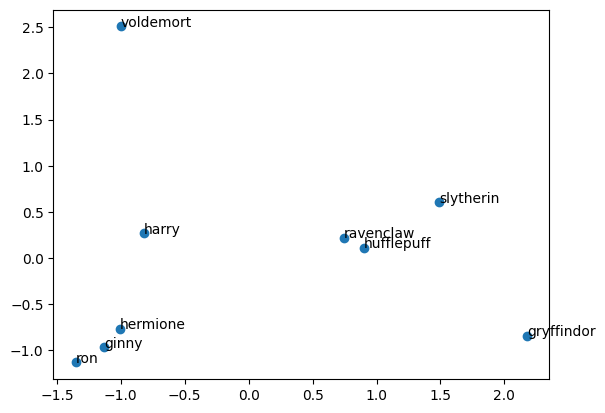

In [47]:
#ich
import sklearn
from sklearn.decomposition import PCA
from matplotlib import pyplot

words =['harry', 'ron', 'hermione', 'voldemort', 'ginny', 'gryffindor', 'slytherin','hufflepuff', 'ravenclaw']
X = model.wv[words]
X
pca = PCA(n_components =2)
result = pca.fit_transform(X)
result
pyplot.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i,0],result[i,1]))
pyplot.show

In [49]:
#meine überlegungen 
#import fastTextWordEmbedding
# data = story_concat
# idx = data.Label == "Positve";
# head(data(idx,:))

#http://de.mathworks.com/help/textanalytics/ug/train-a-sentiment-classifier.html

#from tqdm import tqdm brauchen wir glaube ich doch nicht
from gensim.models.fasttext import FastText

%%time # brauchen wir damit emb funktioniert
# fast_Text_model = FastText(taggeddoc, size = 300, window = 5, min_count=5, sample = 1e-2, workers = 4,sg=1, iter = 100) brauchen wir auch nicht
emb = fastTextWordEmbedding;
data = story_concat
idx = data.Label == "Positve";
#head(data(idx,:)) # funktioniert nicht; nimmt jewiels ,: nicht an
idx = data.Label == "Negative";
#head(data(idx, : )) funktioniert auch nicht
idx = ~isVocabularyWord(emb,data.Word)
#data(idx,:) = []; funktioniert nicht

# numWords = size(data,1);
# cvp = cvpartition(numWords,'HoldOut',0.1);
# dataTrain = data(training(cvp),:);
# dataTest = data(test(cvp),:);

# wordsTrain = datTrain.Word;
# XTrain = word2vec(emb, wordsTrain);
# YTrain = datTrain.Label;

# mdl = fitcsvm(XTrain,YTrain);

# wordsTest = dataTest.Word;
# XTest = word2vec(emb,wordsTest);
# YTest = data.Test.Label;

# [YPred, scores] = predict(mdl,Test);

# figure
# confusionchart(YTest,YPred);

# figure
# subplot(1,2,1)
# idx = YPred == "Positive";
# wordcloud(wordsTest(idx),scores(idx,1));
# title("Predicted Positive Sentiment")

# subplot(1,2,2)
# wordcloud(wordsTest(~idx),scores(~idx,2));
# title("Predicted Negative Sentiment")

SyntaxError: invalid syntax (819932295.py, line 17)